In [1]:
#Assignment 2 Survival Analysis
#Jingyang Wang
#995429

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("covid_data.csv")

/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10,11,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(5)

,Unnamed: 0,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,...,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary,download_date
0,0,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,...,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN,2021-02-22
1,1,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,...,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN,2021-02-22
2,2,000-1-10021,66,male,"Zhenlai County, Baicheng City",Jilin,China,45.948140,123.439600,admin3,...,https://www.google.com/maps/place/Zhenlai+Coun...,NaN,Zhenlai County,Baicheng City,Jilin,China,10096.0,NaN,NaN,2021-02-22
3,3,000-1-10022,27,female,"Longshan District, Liaoyuan City",Jilin,China,42.858020,125.152100,admin3,...,NaN,NaN,Longshan District,Liaoyuan City,Jilin,China,5676.0,NaN,NaN,2021-02-22
4,4,000-1-10023,17,male,"Gongzhuling City, Siping City",Jilin,China,43.783530,124.672900,admin3,...,NaN,NaN,Gongzhuling City,Siping City,Jilin,China,3637.0,NaN,NaN,2021-02-22


In [4]:
df.info

<bound method DataFrame.info of         Unnamed: 0           ID  age     sex  \
0                0     000-1-10   78    male   
1                1    000-1-100   61  female   
2                2  000-1-10021   66    male   
3                3  000-1-10022   27  female   
4                4  000-1-10023   17    male   
...            ...          ...  ...     ...   
572674      572674    010-99995   52  female   
572675      572675    010-99996   52  female   
572676      572676    010-99997   52  female   
572677      572677    010-99998   52    male   
572678      572678    010-99999   52    male   

                                    city          province    country  \
0                             Vo Euganeo            Veneto      Italy   
1                                    NaN               NaN  Singapore   
2          Zhenlai County, Baicheng City             Jilin      China   
3       Longshan District, Liaoyuan City             Jilin      China   
4          Gongzhuling Cit

In [5]:
data=df[["age", "sex","date_confirmation","chronic_disease_binary","date_death_or_discharge","download_date","outcome"]]

In [6]:
data.head(30)

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,download_date,outcome
0,78,male,2020-02-21,False,2020-02-22,2021-02-22,death
1,61,female,2020-02-14,False,2020-02-17,2021-02-22,discharge
2,66,male,2020-07-02,False,NaN,2021-02-22,NaN
3,27,female,2020-07-02,False,NaN,2021-02-22,NaN
4,17,male,2020-07-02,False,NaN,2021-02-22,NaN
5,51,female,2020-07-02,False,NaN,2021-02-22,NaN
6,68,male,2020-08-02,False,NaN,2021-02-22,NaN
7,26,male,2020-08-02,False,NaN,2021-02-22,NaN
8,30,male,2020-08-02,False,NaN,2021-02-22,NaN
9,53,female,2020-08-02,False,NaN,2021-02-22,NaN


In [7]:
for i in data:
    print(i,';',len(data[i].unique()))

age ; 109
sex ; 2
date_confirmation ; 153
chronic_disease_binary ; 2
date_death_or_discharge ; 143
download_date ; 1
outcome ; 28


In [8]:
data["outcome"].unique()

array(['death', 'discharge', nan, 'discharged', 'Discharged',
       'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
       'released from quarantine', 'severe', 'stable', 'died', 'Death',
       'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Receiving Treatment', 'severe illness',
       'critical condition', 'Hospitalized'], dtype=object)

In [9]:
df['outcome']=data['outcome'].str.lower()

In [10]:
data["outcome"].unique()

array(['death', 'discharge', nan, 'discharged', 'Discharged',
       'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
       'released from quarantine', 'severe', 'stable', 'died', 'Death',
       'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Receiving Treatment', 'severe illness',
       'critical condition', 'Hospitalized'], dtype=object)

In [11]:
death = ['death','died','Death','dead','Dead','Died','Deceased']

In [12]:
non_death =[np.nan,'discharge', 'discharged', 'Discharged',
       'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
       'released from quarantine', 'severe', 'stable', 
       'Symptoms only improved with cough. Currently hospitalized for follow-up.', 'Alive', 
       'Recovered', 'Stable', 'stable condition',
       'Under treatment', 'Receiving Treatment', 'severe illness',
       'critical condition', 'Hospitalized']

In [13]:
data=data.replace(regex=death,value=True)

In [14]:
data=data.replace(regex=non_death,value=False)

In [15]:
data=data.replace('treated in an intensive care unit (14.02.2020)',False)

In [16]:
print(data)

        age     sex date_confirmation  chronic_disease_binary  \
0        78    male        2020-02-21                   False   
1        61  female        2020-02-14                   False   
2        66    male        2020-07-02                   False   
3        27  female        2020-07-02                   False   
4        17    male        2020-07-02                   False   
...     ...     ...               ...                     ...   
572674   52  female        2020-05-17                   False   
572675   52  female        2020-05-17                   False   
572676   52  female        2020-05-17                   False   
572677   52    male        2020-05-17                   False   
572678   52    male        2020-05-17                   False   

       date_death_or_discharge download_date  outcome  
0                   2020-02-22    2021-02-22     True  
1                   2020-02-17    2021-02-22    False  
2                        False    2021-02-22    Fal

In [17]:
data["outcome"].unique()

array([ True, False])

In [18]:
data[data['outcome']==1].count()

age                        1368
sex                        1368
date_confirmation          1368
chronic_disease_binary     1368
date_death_or_discharge    1368
download_date              1368
outcome                    1368
dtype: int64

In [19]:
data['outcome'].isnull().sum()

0

In [20]:
data['date_confirmation'] = pd.to_datetime(data['date_confirmation'],errors='coerce')

In [21]:
data['date_death_or_discharge'] = pd.to_datetime(data['date_death_or_discharge'],errors='coerce')

In [22]:
data['download_date'] = pd.to_datetime(data['download_date'],errors='coerce')

In [23]:
print(data)

        age     sex date_confirmation  chronic_disease_binary  \
0        78    male        2020-02-21                   False   
1        61  female        2020-02-14                   False   
2        66    male        2020-07-02                   False   
3        27  female        2020-07-02                   False   
4        17    male        2020-07-02                   False   
...     ...     ...               ...                     ...   
572674   52  female        2020-05-17                   False   
572675   52  female        2020-05-17                   False   
572676   52  female        2020-05-17                   False   
572677   52    male        2020-05-17                   False   
572678   52    male        2020-05-17                   False   

       date_death_or_discharge download_date  outcome  
0                   2020-02-22    2021-02-22     True  
1                   2020-02-17    2021-02-22    False  
2                          NaT    2021-02-22    Fal

In [24]:
data.head(5)

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,download_date,outcome
0,78,male,2020-02-21,False,2020-02-22,2021-02-22,True
1,61,female,2020-02-14,False,2020-02-17,2021-02-22,False
2,66,male,2020-07-02,False,NaT,2021-02-22,False
3,27,female,2020-07-02,False,NaT,2021-02-22,False
4,17,male,2020-07-02,False,NaT,2021-02-22,False


In [25]:
data[data['outcome']==1].count()

age                        1368
sex                        1368
date_confirmation          1327
chronic_disease_binary     1368
date_death_or_discharge     886
download_date              1368
outcome                    1368
dtype: int64

In [26]:
data[data['outcome']==0].count()

age                        571311
sex                        571311
date_confirmation          571078
chronic_disease_binary     571311
date_death_or_discharge      2208
download_date              571311
outcome                    571311
dtype: int64

In [27]:
a=abs(data["download_date"] - data["date_confirmation"])
b=abs(data['date_death_or_discharge'] - data["date_confirmation"])

nat = np.datetime64('NaT')
data['time1']=a
data['time']=b

In [28]:
data.head(5)

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,download_date,outcome,time1,time
0,78,male,2020-02-21,False,2020-02-22,2021-02-22,True,367 days,1 days
1,61,female,2020-02-14,False,2020-02-17,2021-02-22,False,374 days,3 days
2,66,male,2020-07-02,False,NaT,2021-02-22,False,235 days,NaT
3,27,female,2020-07-02,False,NaT,2021-02-22,False,235 days,NaT
4,17,male,2020-07-02,False,NaT,2021-02-22,False,235 days,NaT


In [29]:
data["time"].fillna(data['time1'], inplace=True)

In [30]:
data.head(5)

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,download_date,outcome,time1,time
0,78,male,2020-02-21,False,2020-02-22,2021-02-22,True,367 days,1 days
1,61,female,2020-02-14,False,2020-02-17,2021-02-22,False,374 days,3 days
2,66,male,2020-07-02,False,NaT,2021-02-22,False,235 days,235 days
3,27,female,2020-07-02,False,NaT,2021-02-22,False,235 days,235 days
4,17,male,2020-07-02,False,NaT,2021-02-22,False,235 days,235 days


In [31]:
data = data.drop(['time1'],axis = 1)

In [32]:
data.head(5)

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,download_date,outcome,time
0,78,male,2020-02-21,False,2020-02-22,2021-02-22,True,1 days
1,61,female,2020-02-14,False,2020-02-17,2021-02-22,False,3 days
2,66,male,2020-07-02,False,NaT,2021-02-22,False,235 days
3,27,female,2020-07-02,False,NaT,2021-02-22,False,235 days
4,17,male,2020-07-02,False,NaT,2021-02-22,False,235 days


In [33]:
data.isna().sum()

age                             0
sex                             0
date_confirmation             274
chronic_disease_binary          0
date_death_or_discharge    569585
download_date                   0
outcome                         0
time                          274
dtype: int64

In [34]:
data=data.dropna(subset=['time'])

In [35]:
data.isna().sum()

age                             0
sex                             0
date_confirmation               0
chronic_disease_binary          0
date_death_or_discharge    569355
download_date                   0
outcome                         0
time                            0
dtype: int64

In [36]:
data = data.drop(['date_confirmation',"date_death_or_discharge","download_date"],axis = 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572405 entries, 0 to 572678
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   age                     572405 non-null  int64          
 1   sex                     572405 non-null  object         
 2   chronic_disease_binary  572405 non-null  bool           
 3   outcome                 572405 non-null  bool           
 4   time                    572405 non-null  timedelta64[ns]
dtypes: bool(2), int64(1), object(1), timedelta64[ns](1)
memory usage: 18.6+ MB


In [38]:
data.describe()

,age,time
count,572405.000000,572405
mean,45.688383,282 days 01:33:54.667761468
std,19.708668,73 days 09:48:04.859420483
min,0.000000,0 days 00:00:00
25%,29.000000,269 days 00:00:00
50%,47.000000,293 days 00:00:00
75%,59.000000,330 days 00:00:00
max,121.000000,417 days 00:00:00


In [39]:
data.corr()

,age,chronic_disease_binary,outcome
age,1.000000,0.016563,0.040047
chronic_disease_binary,0.016563,1.000000,0.184663
outcome,0.040047,0.184663,1.000000


In [40]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick

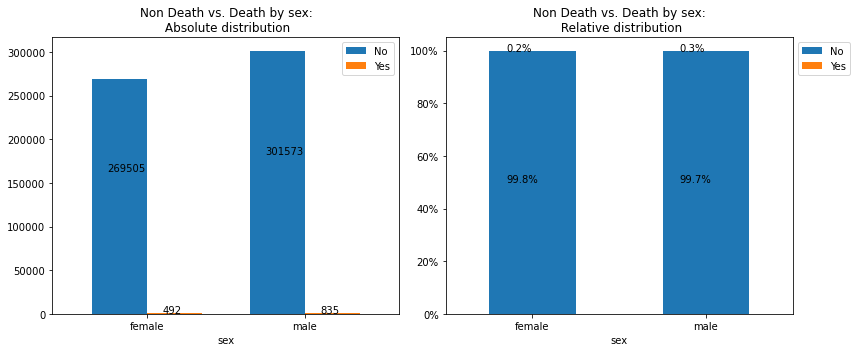

In [41]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['sex', 'outcome'])['outcome'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Non Death vs. Death by sex:\n Absolute distribution') 
plt.legend(['No', 'Yes'])
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['sex', 'outcome'])['outcome'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['No', 'Yes'], bbox_to_anchor=(1, 1))
plt.title('Non Death vs. Death by sex:\n Relative distribution') 


#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))


    
plt.tight_layout()
plt.show()

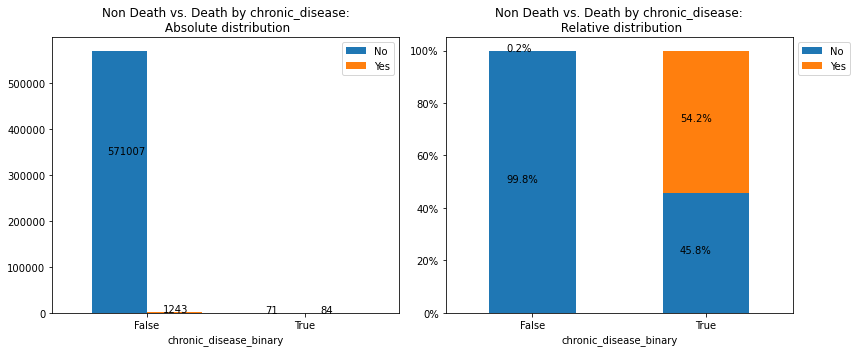

In [42]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['chronic_disease_binary', 'outcome'])['outcome'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Non Death vs. Death by chronic_disease:\n Absolute distribution') 
plt.legend(['No', 'Yes'])
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['chronic_disease_binary', 'outcome'])['outcome'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['No', 'Yes'], bbox_to_anchor=(1, 1))
plt.title('Non Death vs. Death by chronic_disease:\n Relative distribution') 


#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))


    
plt.tight_layout()
plt.show()

In [43]:
import seaborn as sns

/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


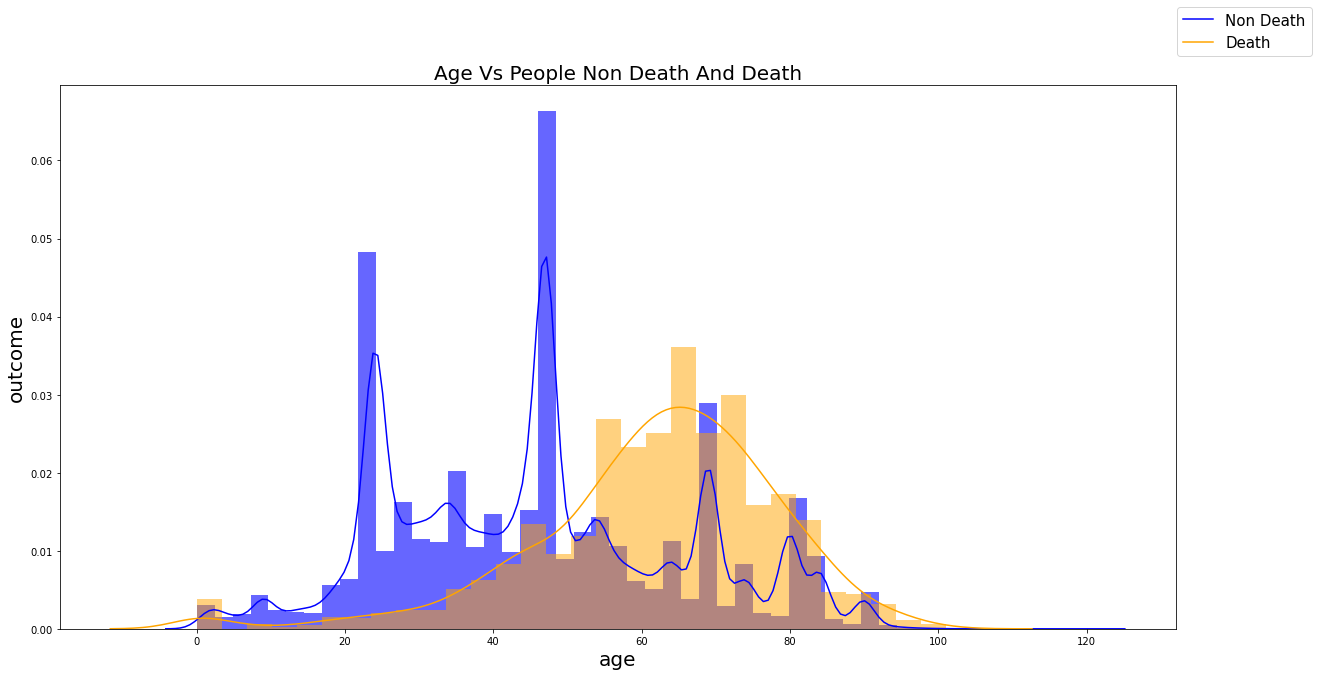

In [44]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['outcome']==0]['age'],color='blue',hist_kws={'alpha':0.6})
sns.distplot(data[data['outcome']==1]['age'],color='orange',hist_kws={'alpha':0.5})
fig.legend(labels=['Non Death','Death'],fontsize=15)
plt.xlabel('age',fontsize=20)
plt.ylabel('outcome',fontsize=20)
plt.title('Age Vs People Non Death And Death',fontsize=20)
plt.show()

# Survival analysis with Kaplan-Meier estimator.

In [45]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [46]:
conda install -c sebp scikit-survival

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import lifelines
import sksurv

In [48]:
data['time'] = data.apply(lambda row: row.time.days, axis=1)

In [49]:
data.head(5)

,age,sex,chronic_disease_binary,outcome,time
0,78,male,False,True,1
1,61,female,False,False,3
2,66,male,False,False,235
3,27,female,False,False,235
4,17,male,False,False,235


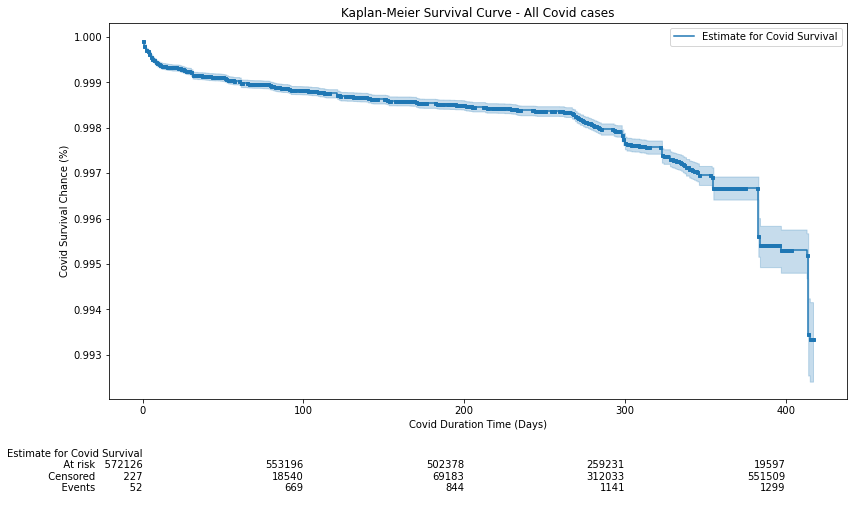

In [50]:
# fitting kmf to the data
days = data['time'].values
outcome = data['outcome'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(days, event_observed=outcome, label='Estimate for Covid Survival')

# plotting kmf curve
fig, ax = plt.subplots(figsize=(12,7))
kmf.plot(ax=ax,show_censors=True, censor_styles={'ms': 3, 'marker': 's'},at_risk_counts=True)
ax.set_title('Kaplan-Meier Survival Curve - All Covid cases')
ax.set_xlabel('Covid Duration Time (Days)')
ax.set_ylabel('Covid Survival Chance (%)')
plt.show()

In [51]:
# Lifetable 
kmf.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,279,52,227,572405,572405
1,188,61,127,0,572126
2,147,47,100,0,571938
3,103,24,79,0,571791
4,102,30,72,0,571688


# time and event need to be stored as a structured array 

In [52]:
def convert_to_stru_array(df,time_column, event_column):
    """
    This function is conver time and event to structured array which is required in scikit-survival Python package.
    
    Inputs:
    df:         the input datafram
    time_column : the column which has TIME information.
    event_column: the column which has EVENT information.
    
    Output:
    X_df: dataframe after removing time and event columns
    Y_stru_array: structured array which is like (event, time)
    """

    #remove the time and event columns from the original dataframe
    X_df = df.drop(columns = [time_column, event_column])
    
    #extract time and event columns
    Y_df = df[[event_column,time_column]]
    Y_np = Y_df.to_numpy()

    #change it to structured array
    Y_recarray   = np.core.records.fromarrays(Y_np.transpose(), dtype=np.dtype([(event_column, np.bool_), (time_column, np.float32)]))
    Y_stru_array = np.array(Y_recarray)
    
    return X_df,Y_stru_array

Text(0.5, 0, 'time $t$')

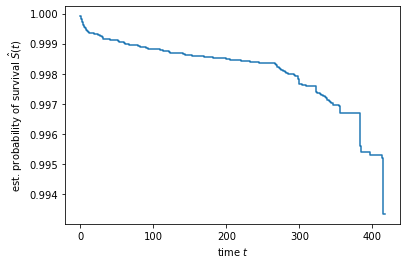

In [53]:
from sksurv.nonparametric import kaplan_meier_estimator

X_df, Y_stru_array = convert_to_stru_array(data,'time', 'outcome')

time, survival_prob = kaplan_meier_estimator(Y_stru_array["outcome"], Y_stru_array["time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

# KM for different groups with lifeline Python package :

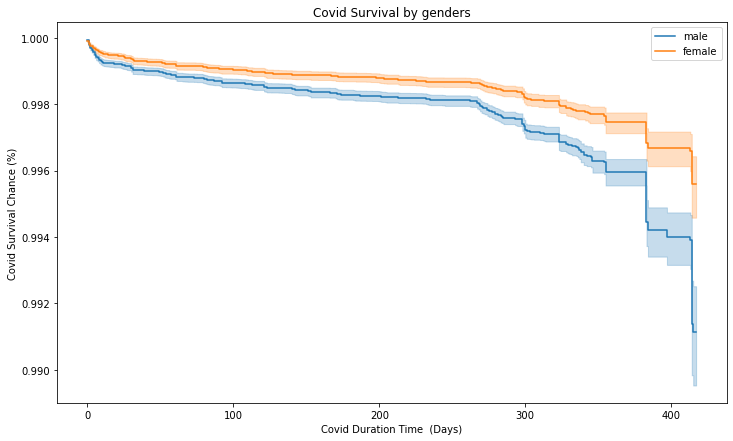

In [54]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='time', event='outcome', df=data, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

# plot by education level
fig_edl, ax_edl = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='sex', ax=ax_edl)
ax_edl.set_title('Covid Survival by genders')
ax_edl.set_xlabel('Covid Duration Time  (Days)')
ax_edl.set_ylabel('Covid Survival Chance (%)')
plt.show()

In [55]:
# check survival curves for different genders
female = (data["sex"] == "female")
T = data["time"]
E = data["outcome"]
kmf.fit(T[female], event_observed=E[female])

from lifelines.statistics import logrank_test

# for the variable which has only two categories.
covid_gender_results = logrank_test(T[female], T[~female], E[female], E[~female], alpha=.99)
covid_gender_results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          60.14 <0.005     46.68

## Plot KM curve for three age groups 
-(young: ageď 40; middle: 40 < age ď 65 and old: age ą 65) in the same plot

-conduct pairwise logrank test test and interpret your result. HINT: check the section 5.Processing data
tips before coding. 

In [56]:
data.head(5)

,age,sex,chronic_disease_binary,outcome,time
0,78,male,False,True,1
1,61,female,False,False,3
2,66,male,False,False,235
3,27,female,False,False,235
4,17,male,False,False,235


In [57]:
# create a function
def age_groups(age):
    if age <= 40:
        return "young"
    elif age > 65:
        return "old"
    else:
        return "middle"

# create a new column based on condition
data['age_groups'] = data['age'].apply(age_groups)

In [58]:
data.head(5)

,age,sex,chronic_disease_binary,outcome,time,age_groups
0,78,male,False,True,1,old
1,61,female,False,False,3,middle
2,66,male,False,False,235,old
3,27,female,False,False,235,young
4,17,male,False,False,235,young


In [59]:
data.age_groups.unique()

array(['old', 'middle', 'young'], dtype=object)

In [60]:
data.isnull().sum()

age                       0
sex                       0
chronic_disease_binary    0
outcome                   0
time                      0
age_groups                0
dtype: int64

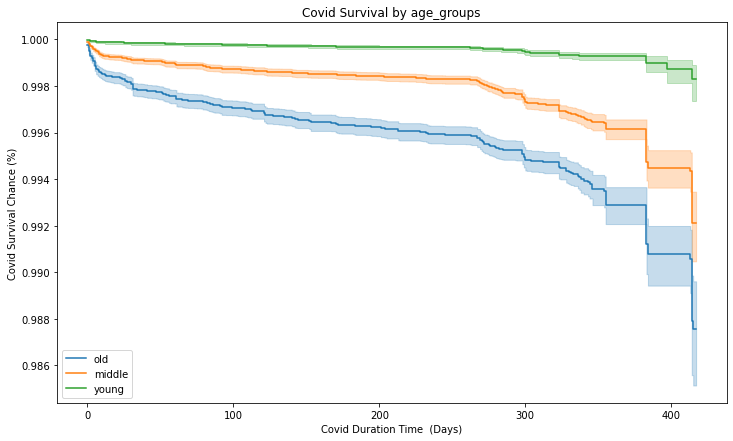

In [61]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='time', event='outcome', df=data, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

# plot by education level
fig_edl, ax_edl = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='age_groups', ax=ax_edl)
ax_edl.set_title('Covid Survival by age_groups')
ax_edl.set_xlabel('Covid Duration Time  (Days)')
ax_edl.set_ylabel('Covid Survival Chance (%)')
plt.show()

# conduct pairwise logrank test test

In [62]:
from lifelines.statistics import pairwise_logrank_test

In [63]:
results = pairwise_logrank_test(data['time'], data['age_groups'], data['outcome'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
              test_statistic      p  -log2(p)
middle old            135.38 <0.005    101.53
       young          312.98 <0.005    230.24
old    young          777.44 <0.005    565.94

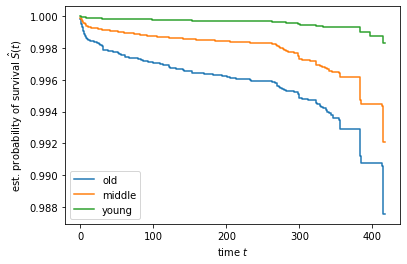

In [64]:
feature = 'age_groups'
time = 'time'
event = 'outcome'
df = data

X_df, Y_stru_array = convert_to_stru_array(df,time, event)
for cat in X_df[feature].unique():
    idx = X_df[feature] == cat
    time_feature, survival_prob_feature = sksurv.nonparametric.kaplan_meier_estimator(
    Y_stru_array[event][idx],
    Y_stru_array[time][idx])

    plt.step(time_feature, survival_prob_feature, where="post",label="%s" % cat)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")



In [65]:
from sksurv.compare import compare_survival
logrank_sksurv = compare_survival(Y_stru_array, X_df.age_groups,return_stats = True)
logrank_sksurv

(710.7640744556854,
 4.5660668381758864e-155,
         counts  observed    expected   statistic
 group                                           
 middle  228220       609  534.507782   74.492218
 old     112880       600  273.870746  326.129254
 young   231305       118  518.621472 -400.621472,
 array([[ 319.06719463, -110.4465462 , -208.62064843],
        [-110.4465462 ,  216.84295408, -106.39640788],
        [-208.62064843, -106.39640788,  315.01705631]]))

------------------------------------------------------------------------------

# Semi-parametric: Cox regression

In [66]:
data.head(5)

,age,sex,chronic_disease_binary,outcome,time,age_groups
0,78,male,False,True,1,old
1,61,female,False,False,3,middle
2,66,male,False,False,235,old
3,27,female,False,False,235,young
4,17,male,False,False,235,young


In [67]:
# one hot encode the categorical features
data2 = pd.get_dummies(data, columns=['sex',"age_groups"],prefix=['sex',"age_groups"],drop_first=True)
data2.head()

,age,chronic_disease_binary,outcome,time,sex_male,age_groups_old,age_groups_young
0,78,False,True,1,1,1,0
1,61,False,False,3,0,0,0
2,66,False,False,235,1,1,0
3,27,False,False,235,0,0,1
4,17,False,False,235,1,0,1


In [68]:
data2 = data2.drop(['age'],axis = 1)
data2.head()

,chronic_disease_binary,outcome,time,sex_male,age_groups_old,age_groups_young
0,False,True,1,1,1,0
1,False,False,3,0,0,0
2,False,False,235,1,1,0
3,False,False,235,0,0,1
4,False,False,235,1,0,1


In [69]:
data2.isna().sum()

chronic_disease_binary    0
outcome                   0
time                      0
sex_male                  0
age_groups_old            0
age_groups_young          0
dtype: int64

In [70]:
data2.age_groups_old.unique()

array([1, 0], dtype=uint8)

In [71]:
data3 = data2.drop(['chronic_disease_binary',"age_groups_old","age_groups_young"],axis = 1)

In [72]:
#fit
from sklearn.model_selection import train_test_split
random.seed(10)

data3_train,data3_test = train_test_split(data3,test_size=0.35)

covid_cph = lifelines.CoxPHFitter()
covid_cph.fit(data3_train, duration_col='time', event_col='outcome', show_progress=True)
covid_cph.print_summary()

Iteration 1: norm_delta = 0.19700, step_size = 0.9000, log_lik = -10814.07439, newton_decrement = 16.91374, seconds_since_start = 1.4
Iteration 2: norm_delta = 0.02404, step_size = 0.9000, log_lik = -10797.18619, newton_decrement = 0.24017, seconds_since_start = 2.9
Iteration 3: norm_delta = 0.00253, step_size = 0.9000, log_lik = -10796.94779, newton_decrement = 0.00264, seconds_since_start = 4.4
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -10796.94514, newton_decrement = 0.00000, seconds_since_start = 5.8
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 372063 total observations, 371192 right-censored observations>
             duration col = 'time'
                event col = 'outcome'
      baseline estimation = breslow
   number of observations = 372063
number of events observed = 871
   partial log-likelihood = -10796.95
         time fit was run = 2022-03-15 09:33:51 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex_male    0.40       1.50       0.07             0.27             0.54                 1.31                 1.72

             z      p   -log2(p)
covariate                       
sex_male  5.78 <0.005      26.97
---
Concordance = 0.54
Partial AIC = 21595.89
log-likelihood ratio test = 34.26 on 1 df
-log2(p) of ll-ratio test = 27.63

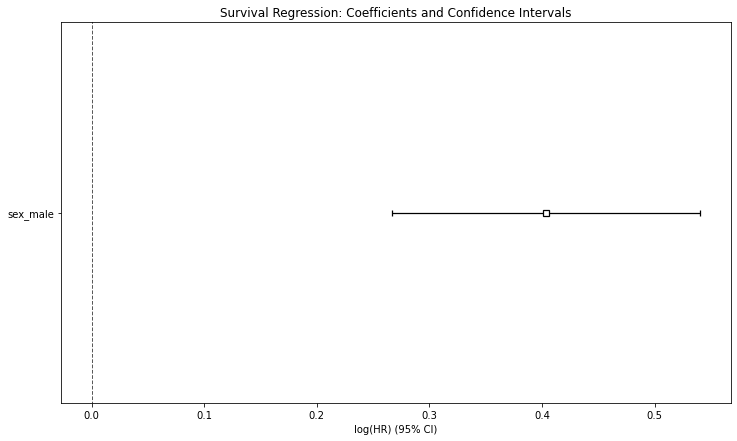

In [73]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confidence Intervals')
covid_cph.plot(ax=ax_coef);

In [74]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(covid_cph, data3_train, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 372063 total observations, 371192 right-censored observations>
         test_name = proportional_hazard_test

---
          test_statistic    p  -log2(p)
sex_male            2.92 0.09      3.52

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 372063 total observations, 371192 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic    p  -log2(p)
sex_male km              4.60 0.03      4.97
         rank            2.92 0.09      3.52



1. Variable 'sex_male' failed the non-proportional test: p-value is 0.0319.

   Advice: with so few unique values (only 2), you can include `strata=['sex_male', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0875)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0319)'>]]

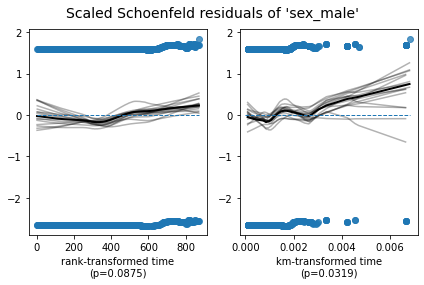

In [75]:
covid_cph.check_assumptions(data3_train, p_value_threshold=0.05, show_plots=True)

Text(0, 0.5, 'log(-log(Covid Survival Chance (%)))')

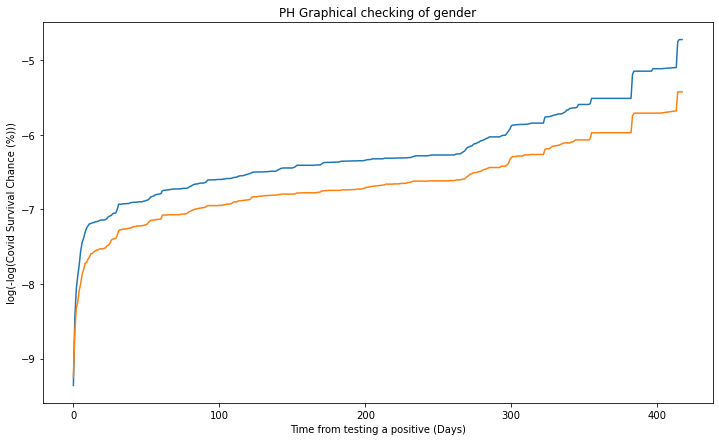

In [76]:
# quick check visually log(-log(surv)) vs time
def graphical_checking_PH(feature, time='time', event='outcome', df=data, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][time], event_observed=df[idx][event], label=cat)
        kmf_surv = kmf.survival_function_.reset_index()
        plt.plot(kmf_surv.timeline,np.log(-np.log(kmf_surv[cat])),label = cat)

# plot by high-tech
fig, ax = plt.subplots(figsize=(12,7))
graphical_checking_PH(feature='sex', ax=ax)
ax.set_title('PH Graphical checking of gender')
ax.set_xlabel('Time from testing a positive (Days)')
ax.set_ylabel('log(-log(Covid Survival Chance (%)))')

Text(0, 0.5, 'log(-log(Covid Survival Chance (%)))')

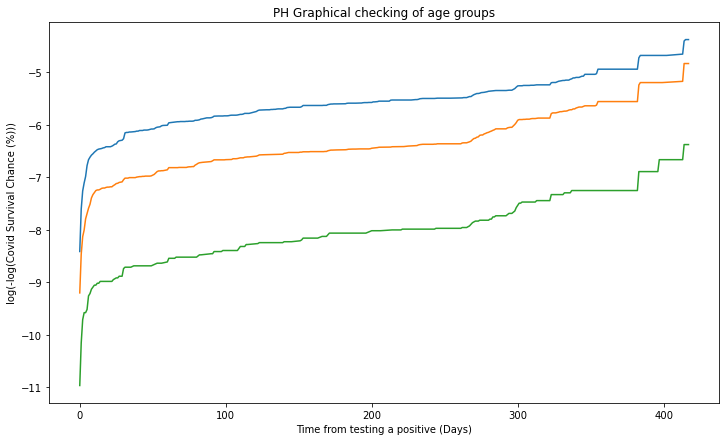

In [88]:
# quick check visually log(-log(surv)) vs time
def graphical_checking_PH(feature, time='time', event='outcome', df=data, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][time], event_observed=df[idx][event], label=cat)
        kmf_surv = kmf.survival_function_.reset_index()
        plt.plot(kmf_surv.timeline,np.log(-np.log(kmf_surv[cat])),label = cat)

# plot by high-tech
fig, ax = plt.subplots(figsize=(12,7))
graphical_checking_PH(feature='age_groups', ax=ax)
ax.set_title('PH Graphical checking of age groups')
ax.set_xlabel('Time from testing a positive (Days)')
ax.set_ylabel('log(-log(Covid Survival Chance (%)))')

In [77]:
data4 = data2.drop(['chronic_disease_binary'],axis = 1)
data4.head()

,outcome,time,sex_male,age_groups_old,age_groups_young
0,True,1,1,1,0
1,False,3,0,0,0
2,False,235,1,1,0
3,False,235,0,0,1
4,False,235,1,0,1


In [78]:
#fit
from sklearn.model_selection import train_test_split
random.seed(10)
strata_variable=["sex_male"]
data4_train,data4_test = train_test_split(data4,test_size=0.35)

covid_cph_2 = lifelines.CoxPHFitter()
covid_cph_2.fit(data4_train, duration_col='time', event_col='outcome', show_progress=True,strata=strata_variable)
covid_cph_2.print_summary()

Iteration 1: norm_delta = 0.63603, step_size = 0.9000, log_lik = -10025.96591, newton_decrement = 242.60297, seconds_since_start = 1.9
Iteration 2: norm_delta = 0.38442, step_size = 0.9000, log_lik = -9796.01888, newton_decrement = 26.30737, seconds_since_start = 3.7
Iteration 3: norm_delta = 0.08758, step_size = 0.9000, log_lik = -9769.22243, newton_decrement = 1.18403, seconds_since_start = 5.6
Iteration 4: norm_delta = 0.00680, step_size = 1.0000, log_lik = -9767.98422, newton_decrement = 0.00634, seconds_since_start = 7.4
Iteration 5: norm_delta = 0.00004, step_size = 1.0000, log_lik = -9767.97786, newton_decrement = 0.00000, seconds_since_start = 9.2
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -9767.97786, newton_decrement = 0.00000, seconds_since_start = 10.9
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 372063 total observations, 371208 right-censored observations>
             duration col = 'time'
                event col = 'outcome'
                   strata = ['sex_male']
      baseline estimation = breslow
   number of observations = 372063
number of events observed = 855
   partial log-likelihood = -9767.98
         time fit was run = 2022-03-15 09:36:15 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
age_groups_old     0.67       1.96       0.07             0.53             0.81                 1.70                 2.26
age_groups_young  -1.70       0.18       0.13            -1.95            -1.45                 0.14                 0.23

                      z      p   -log2(p)
covariate                                
age_groups_old     9.40 <0.005      67.34
age_groups_young -13.20 <0.005     129.70
---
Concordance = 0.71
Partial AIC = 19539.96
log-likelihood ratio test = 515.98 on 2 df
-log2(p) of ll-ratio test = 372.20

In [79]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(covid_cph_2, data4_train, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 372063 total observations, 371208 right-censored observations>
         test_name = proportional_hazard_test

---
                  test_statistic      p  -log2(p)
age_groups_old              8.62 <0.005      8.23
age_groups_young            1.56   0.21      2.24

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 372063 total observations, 371208 right-censored observations>
         test_name = proportional_hazard_test

---
                       test_statistic      p  -log2(p)
age_groups_old   km              9.50 <0.005      8.93
                 rank            8.62 <0.005      8.23
age_groups_young km              0.86   0.35      1.50
                 rank            1.56   0.21      2.24



1. Variable 'age_groups_old' failed the non-proportional test: p-value is 0.0021.

   Advice: with so few unique values (only 2), you can include `strata=['age_groups_old', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0033)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0021)'>]]

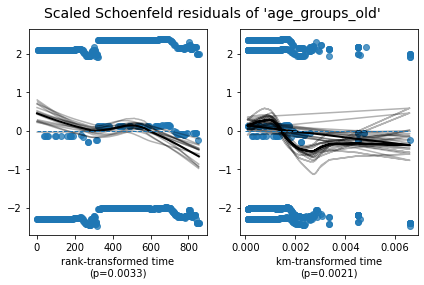

In [80]:
covid_cph_2.check_assumptions(data4_train, p_value_threshold=0.05, show_plots=True)

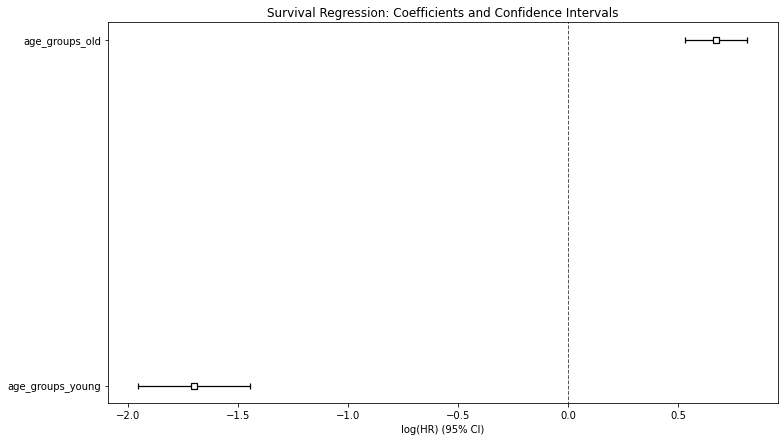

In [81]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confidence Intervals')
covid_cph_2.plot(ax=ax_coef);

# Random Survival Forest

In [83]:
from sklearn.model_selection import train_test_split
random.seed(10)

data2_train,data2_test = train_test_split(data2,test_size=0.35)
data2_train

,chronic_disease_binary,outcome,time,sex_male,age_groups_old,age_groups_young
263885,False,False,340,0,0,0
520318,False,False,202,1,0,1
463884,False,False,269,1,0,1
480662,False,False,353,1,0,0
224656,False,False,110,0,1,0
...,...,...,...,...,...,...
556516,False,False,285,0,0,0
375334,False,False,201,0,0,0
167643,False,False,305,0,0,0
338134,False,False,383,1,0,1


In [84]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest

X_train_cox, Y_train_cox = convert_to_stru_array(data2_train,'time', 'outcome')
X_test_cox, Y_test_cox = convert_to_stru_array(data2_test,'time', 'outcome')


random_state = 20
sksurv_rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
sksurv_rsf.fit(X_train_cox, Y_train_cox)

RandomSurvivalForest(max_features='sqrt', min_samples_leaf=15,
                     min_samples_split=10, n_jobs=-1, random_state=20)

In [85]:
sksurv_rsf.score(X_test_cox, Y_test_cox)

0.7580035391276385

In [86]:
conda install -c conda-forge eli5

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [87]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(sksurv_rsf, n_iter=3, random_state=random_state)
perm.fit(X_test_cox, Y_test_cox)
eli5.show_weights(perm, feature_names=X_train_cox.columns.tolist())

Weight,Feature
0.0987 ± 0.0136,age_groups_young
0.0733 ± 0.0088,age_groups_old
0.0177 ± 0.0061,sex_male
0.0171 ± 0.0000,chronic_disease_binary
